In [1030]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1031]:
from scipy import stats
from scipy.stats import randint

In [1032]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [1033]:
from sklearn.linear_model import LogisticRegression

In [1034]:
from sklearn.tree import DecisionTreeClassifier

In [1035]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [1036]:
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    precision_recall_curve,
)
from sklearn.model_selection import cross_val_score

In [1037]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [1038]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [1039]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [1040]:
from subprocess import check_output

In [1041]:
# read the data from the file
data = pd.read_csv("data/mental-health-in-tech-survey.zip")

In [1042]:
# How many rows and columns (we have 1259 rows and 27 columns)
print(data.shape)

(1259, 27)


In [1043]:
# with numerical val in this case: age
# print(data.describe())

In [1044]:
# what kind of data do we have?
# print(data.info())

In [1045]:
# Cleaning the data by dropping unnecessary columns
data = data.drop(["Timestamp"], axis=1)

In [1046]:
# print(data.info())

In [1047]:
data = data.drop(["comments"], axis=1)
data = data.drop(["state"], axis=1)

In [1048]:
# print(data.info())

In [1049]:
data.isnull().sum().max()

264

In [1050]:
# addressing the missing data
defaultNum = 0
defaultStr = "NaN"
defaultFl = 0.0
numFeat = ["Age"]
strFeat = [
    "Gender",
    "Country",
    "self_employed",
    "family_history",
    "treatment",
    "work_interfere",
    "no_employees",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
    "mental_vs_physical",
    "obs_consequence",
]
fltFeat = []

In [1051]:
for item in data:
    if item in numFeat:
        data[item] = data[item].fillna(defaultNum)
    elif item in strFeat:
        data[item] = data[item].fillna(defaultStr)
    elif item in fltFeat:
        data[item] = data[item].fillna(defaultFl)

In [1052]:
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [1053]:
# Normalizing cases
gender = data["Gender"].str.lower()
# print(gender)

In [1054]:
gender = data["Gender"].str.lower().unique()
print(gender)

['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']


In [1055]:
male = [
    "male",
    "m",
    "male-ish",
    "maile",
    "mal",
    "male (cis)",
    "make",
    "male ",
    "man",
    "msle",
    "mail",
    "malr",
    "cis man",
    "Cis Male",
    "cis male",
]
trans = [
    "trans-female",
    "something kinda male?",
    "queer/she/they",
    "non-binary",
    "nah",
    "all",
    "enby",
    "fluid",
    "genderqueer",
    "androgyne",
    "agender",
    "male leaning androgynous",
    "guy (-ish) ^_^",
    "trans woman",
    "neuter",
    "female (trans)",
    "queer",
    "ostensibly male, unsure what that really means",
]
female = [
    "cis female",
    "f",
    "female",
    "woman",
    "femake",
    "female ",
    "cis-female/femme",
    "female (cis)",
    "femail",
]
# data.head(5)

In [1056]:
# setting to unique attributes
for (row, col) in data.iterrows():
    if str.lower(col.Gender) in male:
        data["Gender"].replace(
            to_replace=col.Gender, value="male", inplace=True
        )

    elif str.lower(col.Gender) in female:
        data["Gender"].replace(
            to_replace=col.Gender, value="female", inplace=True
        )
    elif str.lower(col.Gender) in trans:
        data["Gender"].replace(
            to_replace=col.Gender, value="trans", inplace=True
        )
extra = ["A little about you", "p"]
data = data[~data["Gender"].isin(extra)]
print(data["Gender"].unique())

['female' 'male' 'trans']


In [1057]:
# Fill in the missing age
data["Age"].fillna(data["Age"].median(), inplace=True)
# adress unreasonable values
array = pd.Series(
    data["Age"]
)  # series returns sth like an array of any object type
array[array < 18] = data["Age"].median()

data["Age"] = array

array = pd.Series(data["Age"])
array[array > 120] = data["Age"].median()
data["Age"] = array

In [1058]:
# group by age range
data["Age_range"] = pd.cut(
    data["Age"],
    [0, 20, 30, 65, 100],
    labels=["0-20", "21-30", "31-65", "66-100"],
    include_lowest=True,
)
# change all non employed people from NaN to NOT self employed
data["self_employed"] = data["self_employed"].replace([defaultStr], "No")
print(data["self_employed"].unique())
# also change the NaN in work_intefere to don't know
data["work_interfere"] = data["work_interfere"].replace(
    [defaultStr], "Do not know"
)
print(data["work_interfere"].unique())

['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes' 'Do not know']


In [1059]:
for (row, col) in data.iterrows():
    if col.work_interfere == "Do not know":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=0, inplace=True
        )
    if col.work_interfere == "Never":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=1, inplace=True
        )
    if col.work_interfere == "Rarely":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=2, inplace=True
        )
    if col.work_interfere == "Sometimes":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=3, inplace=True
        )
    if col.work_interfere == "Often":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=4, inplace=True
        )

In [1066]:
print(data["no_employees"].unique())

[1 5 2 3 0 4]


In [1067]:
for (row, col) in data.iterrows():
    if col.no_employees == "1-5":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=0, inplace=True
        )
    if col.no_employees == "6-25":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=1, inplace=True
        )
    if col.no_employees == "26-100":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=2, inplace=True
        )
    if col.no_employees == "100-500":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=3, inplace=True
        )
    if col.no_employees == "500-1000":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=4, inplace=True
        )
    if col.no_employees == "More than 1000":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=5, inplace=True
        )

In [1068]:
data["Age"]
data["Age_range"]

0       31-65
1       31-65
2       31-65
3       31-65
4       31-65
        ...  
1254    21-30
1255    31-65
1256    31-65
1257    31-65
1258    21-30
Name: Age_range, Length: 1257, dtype: category
Categories (4, object): ['0-20' < '21-30' < '31-65' < '66-100']

In [1069]:
# encoding the data
labels = {}  # to hold labels

for item in data:
    lep = preprocessing.LabelEncoder()
    lep.fit(data[item])
    mapping = dict(zip(lep.classes_, lep.transform(lep.classes_)))

    data[item] = lep.transform(data[item])

    # get the labels
    key = "label_" + item
    value = [*mapping]
    labels[key] = value

    print(key)
    print(lep.classes_)
    print(lep.transform(lep.classes_))

# for key, value in labels.items():
# print(key, value)


data.head()

label_Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
label_Gender
['female' 'male' 'trans']
[0 1 2]
label_Country
['Australia' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Brazil'
 'Bulgaria' 'Canada' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Hungary' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia'
 'Mexico' 'Moldova' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Singapore'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'United Kingdom' 'United States' 'Uruguay' 'Zimbabwe']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 4

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,19,0,44,0,0,1,4,1,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,0,0,0,2,1,0,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,0,1,1,4,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,0,0,0,1,3,1,1,...,0,1,1,1,2,2,2,0,0,2


In [1070]:
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,19,0,44,0,0,1,4,1,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,0,0,0,2,1,0,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,0,1,1,4,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,0,0,0,1,3,1,1,...,0,1,1,1,2,2,2,0,0,2


In [1071]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age_range                      0      0.0
care_options                   0      0.0
Gender                         0      0.0
Country                        0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
wellness_program               0      0.0
obs_consequence                0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0  

Index(['treatment', 'work_interfere', 'family_history', 'care_options',
       'benefits', 'obs_consequence', 'anonymity', 'mental_health_interview',
       'wellness_program', 'seek_help', 'Country', 'Age'],
      dtype='object')


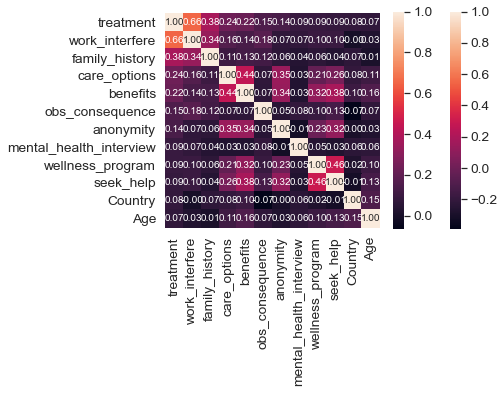

In [1072]:
# covariance
mat = data.corr()
sns.heatmap(mat, square=True)
# f, ax= plt.subplots(12,9)
v = 12
cols = mat.nlargest(v, "treatment")["treatment"].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

Text(0.5, 0, 'Work Interference')

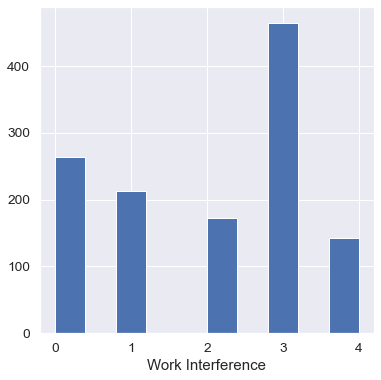

In [1073]:
plt.figure(figsize=(6, 6))
plt.hist(data["work_interfere"])
plt.xlabel("Work Interference")

/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Gender')

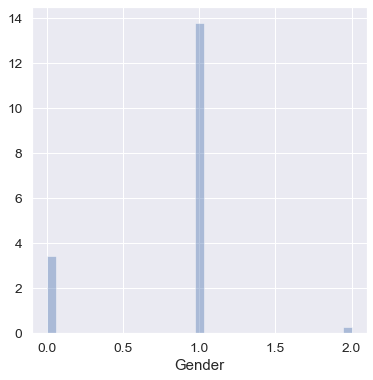

In [1074]:
plt.figure(figsize=(6, 6))
sns.distplot(data["Gender"])
plt.xlabel("Gender")

Text(0.5, 0, 'no_employees')

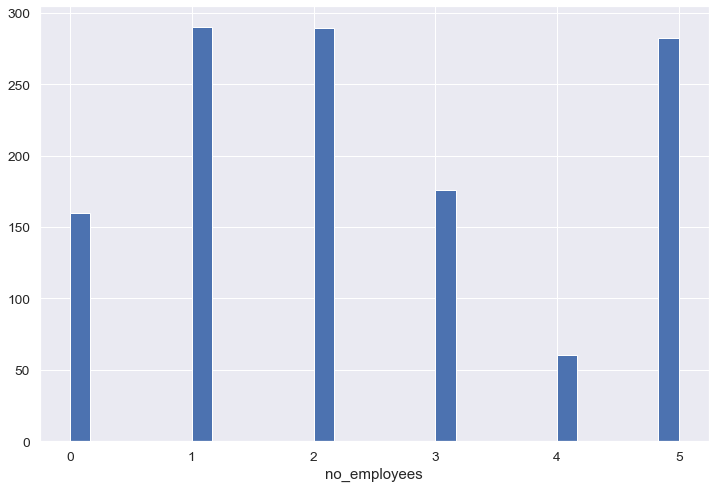

In [1075]:
plt.figure(figsize=(12, 8))
plt.hist(data["no_employees"], bins=30)
plt.xlabel("no_employees")

Text(0.5, 0, 'Country')

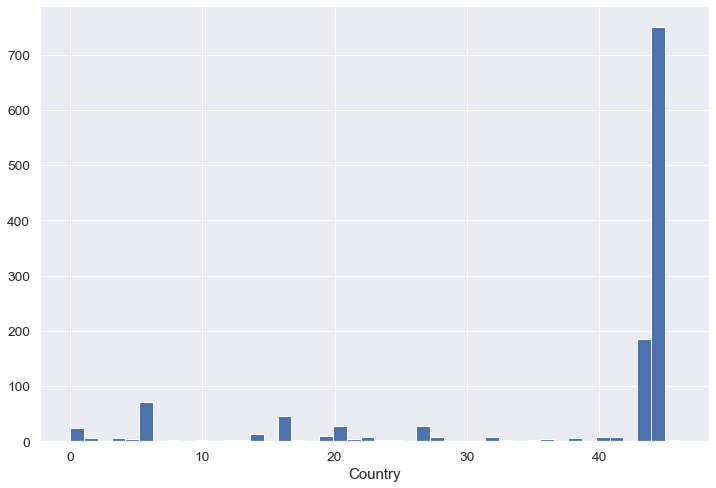

In [1076]:
plt.figure(figsize=(12, 8))
plt.hist(data["Country"], bins=44)
plt.xlabel("Country")

/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'tech_company')

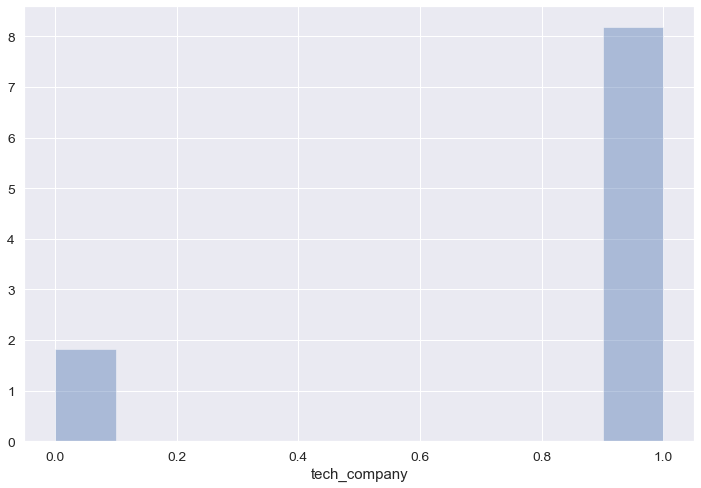

In [1077]:
plt.figure(figsize=(12, 8))
sns.distplot(data["tech_company"], bins=10)
plt.xlabel("tech_company")

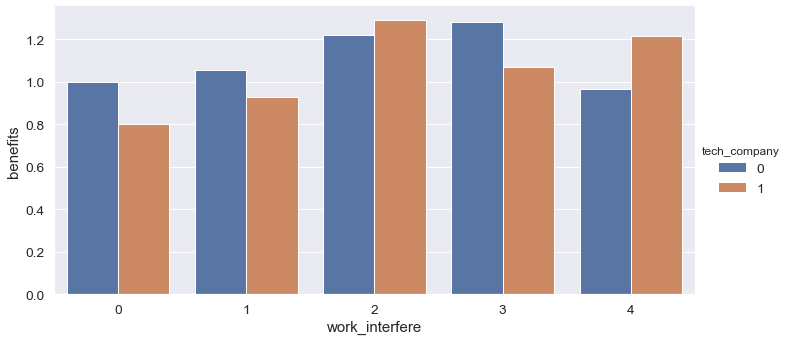

In [1078]:
g = sns.catplot(
    x="work_interfere",
    y="benefits",
    hue="tech_company",
    data=data,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True,
)

In [1079]:
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,19,0,44,0,0,1,4,1,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,0,0,0,2,1,0,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,0,1,1,4,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,0,0,0,1,3,1,1,...,0,1,1,1,2,2,2,0,0,2


/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

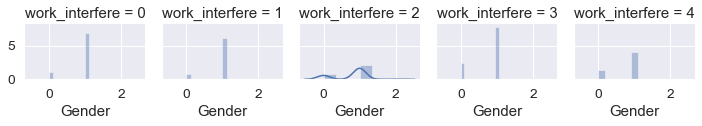

In [1080]:
plt.figure(figsize=(12, 12))
g = sns.FacetGrid(data, col="work_interfere", height=2)
g = g.map(sns.distplot, "Gender")

/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

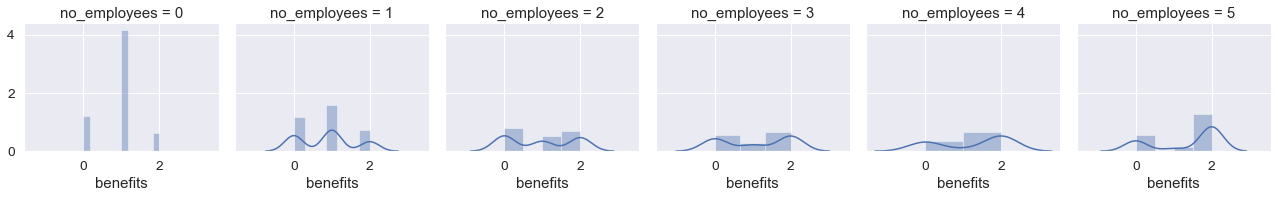

In [1081]:
plt.figure(figsize=(12, 12))
g = sns.FacetGrid(data, col="no_employees", height=3)
g = g.map(sns.distplot, "benefits")

Text(0.5, 0, 'no_employees')

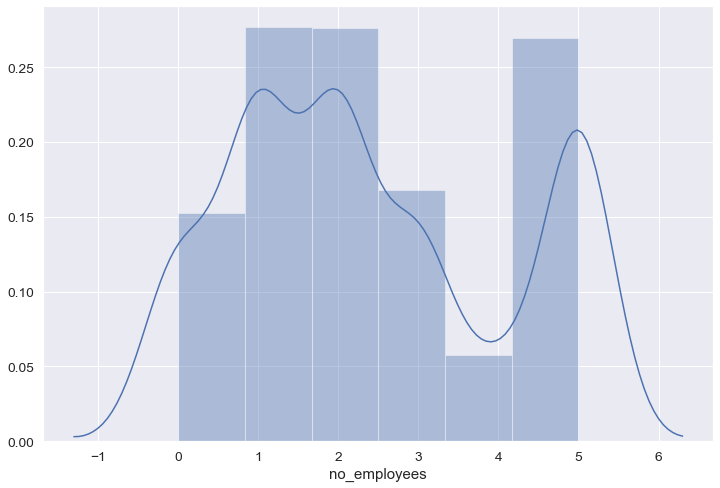

In [1083]:
plt.figure(figsize=(12, 8))
sns.distplot(data["no_employees"], bins=6)
plt.xlabel("no_employees")